# Exploration of MiMoText graph data in Python

# Retrieving SPARQL Queries with Python

We can access the MiMoTextBase SPARQL endpoint also with Python, which enables us to directly load and analyze the data we have queried. To do this, one can employ [requests](http://docs.python-requests.org/en/master/). We can create the request by adding the query as a parameter as follows.

# Token count of full texts 

In [ ]:
import requests

url = 'https://query.mimotext.uni-trier.de/proxy/wdqs/bigdata/namespace/wdq/sparql'
query = """
prefix wd:<http://data.mimotext.uni-trier.de/entity/> 
prefix wdt:<http://data.mimotext.uni-trier.de/prop/direct/> 
SELECT distinct
  ?year ?itemLabel ?token ?narrativeFormLabel 
WHERE {
  ?item wdt:P2 wd:Q2.
  ?item wdt:P40 ?token
  OPTIONAL { ?item wdt:P33 ?narrativeForm}
  OPTIONAL { ?item wdt:P9 ?date}
  OPTIONAL { ?item wdt:P36 ?theme}
  OPTIONAL { ?item wdt:P32 ?narrativeLocation. 
  
  }
  BIND(str(year(?date)) as ?year)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
ORDER BY ?year

"""
r = requests.get(url, params = {'format': 'json', 'query': query})
data = r.json()

Let's examine the contents of the variable named "data":

In [ ]:
data

We have stored the SPARQL query in the `query` variable. To execute the query, we need to provide the SPARQL endpoint URL, which is https://query.mimotext.uni-trier.de/proxy/wdqs/bigdata/namespace/wdq/sparql. Additionally, we want the output format to be JSON. Although the API returns XML by default, it also supports JSON, TSV, CSV, and Binary RDF. To obtain the results in JSON format, we include this specification in our request.

The API will respond with a JSON containing all the rows retrieved from the query. We can then conveniently collect these rows into a Pandas DataFrame using the following code below.

By making the request to the specified SPARQL endpoint URL with the query and format parameters set accordingly, we obtain the response in JSON format. The response is then parsed, and the rows are collected into a [Pandas](https://pandas.pydata.org/) DataFrame. Finally, we can display the DataFrame to view the results.


In [125]:
import pandas as pd
from collections import OrderedDict

novels = []
for item in data['results']['bindings']:
    novels.append(OrderedDict({
        'novel': item['itemLabel']['value'],
        'narration': item['narrativeFormLabel']['value']
            if 'narrativeFormLabel' in item else None,
        'year': item['year']['value'],
        'theme': item['themeLabel']['value'] 
            if 'themeLabel' in item else None,
        'token': item['token']['value'] 
            if 'token' in item else None,
        'narrativeLocation': item['narrativeLocationLabel']['value'] 
            if 'narrativeLocationLabel' in item else None
    }))

df = pd.DataFrame(novels)
df.set_index('novel', inplace=True)
df = df.astype({'year': int, 'token': int})
df.head()

,narration,year,theme,token,narrativeLocation
novel,,,,,
Histoire de la félicité,autodiegetic,1751,None,10888,None
Mémoires,autodiegetic,1751,None,37842,None
Les avis d’un père à son fils,autodiegetic,1751,None,19081,None
Le bal de Venise,homodiegetic,1751,None,17326,None
Le Micromégas,heterodiegetic,1752,None,7110,None


Let's visualize the collected data and compare the different properties for each novel.

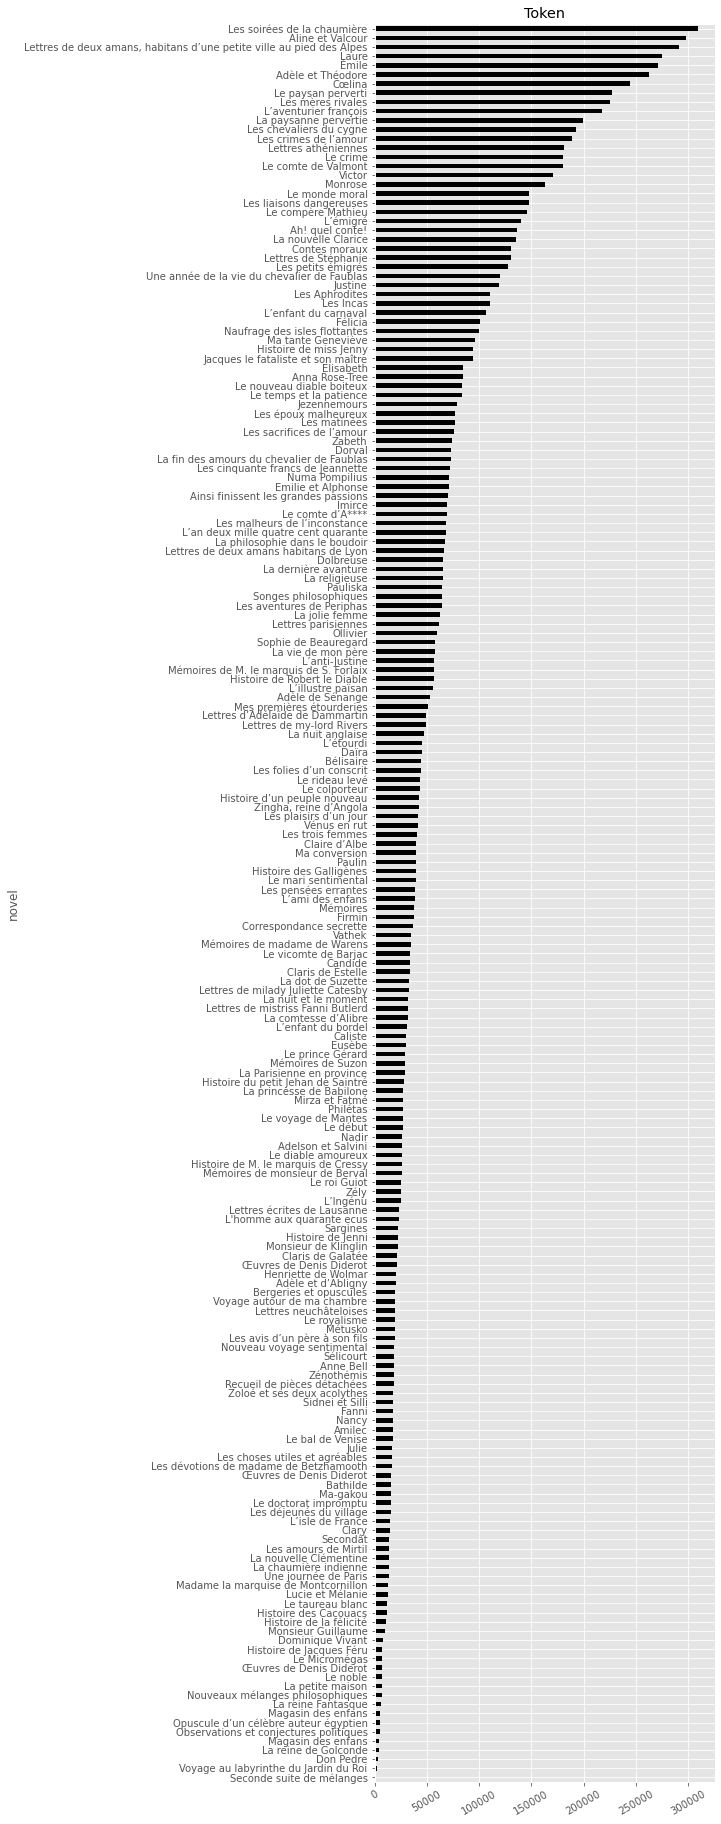

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(15, 50))
for i, label in enumerate(['token']):
    plt.subplot(2, 2, i + 1)
    df_plot = df[label].sort_values().dropna()
    df_plot.plot(kind='barh', color='black', ax=plt.gca());
    plt.ylabel('novel')
    plt.xticks(rotation=30)
    plt.title(label.capitalize())
    plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

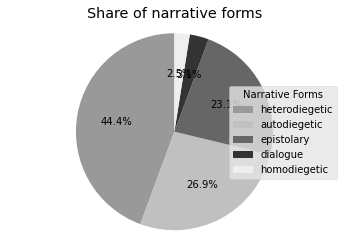

In [127]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Count the number of occurrences for each gender
narration_counts = df['narration'].value_counts()

# Define grayscale colors
colors = ['#999999', '#C0C0C0', '#666666', '#333333', '#EEEEEE']

# Plotting a pie chart with grayscale colors
patches, texts, _ = plt.pie(narration_counts, colors=colors, startangle=90, autopct='%1.1f%%')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Set title
plt.title('Share of narrative forms')

# Create legend from the patches and texts generated by the pie chart
plt.legend(patches, narration_counts.index, title='Narrative Forms', loc='center right', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()


# Literary production of french novels 1751-1800

In [108]:
import requests

url = 'https://query.mimotext.uni-trier.de/proxy/wdqs/bigdata/namespace/wdq/sparql'
query = """
prefix wd:<http://data.mimotext.uni-trier.de/entity/> 
prefix wdt:<http://data.mimotext.uni-trier.de/prop/direct/> 
Select   (str(SAMPLE(year(?date))) as ?year) (count(?itemLabel) as ?count)  
   WHERE{
   ?item rdfs:label ?itemLabel .
   ?item wdt:P9 ?date .
   FILTER(lang(?itemLabel) = "en")
   BIND(str(year(?date)) as ?year)
   SERVICE wikibase:label {bd:serviceParam wikibase:language "en".}
  }

GROUP BY ?year

ORDER BY ?year

"""
r = requests.get(url, params = {'format': 'json', 'query': query})
data = r.json()

In [ ]:
data

In [110]:
import pandas as pd
from collections import OrderedDict

novels = []
for item in data['results']['bindings']:
    novels.append(OrderedDict({
      # 'novel': item['itemLabel']['value'],
     #   'narration': item['narrativeFormLabel']['value']
       #     if 'narrativeFormLabel' in item else None,
        'year': item['year']['value'],
      #  'theme': item['themeLabel']['value'] 
     #       if 'themeLabel' in item else None,
        'novels': item['count']['value'] 
            if 'count' in item else None,
      #  'narrativeLocation': item['narrativeLocationLabel']['value'] 
      #      if 'narrativeLocationLabel' in item else None
    }))

df = pd.DataFrame(novels)
df.set_index('year', inplace=True)
df = df.astype({'novels': float})
df.head()

,novels
year,
1751,31.0
1752,28.0
1753,24.0
1754,24.0
1755,34.0


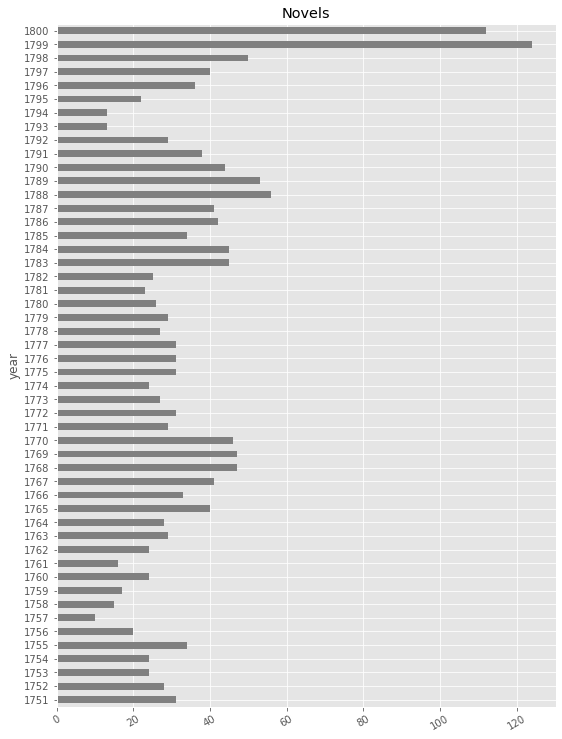

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(15, 20))
for i, label in enumerate(['novels']):
    plt.subplot(2, 2, i + 1)
    df_plot = df[label].dropna()
    df_plot.plot(kind='bar', color='grey', ax=plt.gca());
    plt.ylabel('year')
    plt.xticks(rotation=30)
    plt.title(label.capitalize())
    plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

# Gender of authors

In [112]:
import requests

url = 'https://query.mimotext.uni-trier.de/proxy/wdqs/bigdata/namespace/wdq/sparql'
query = """
PREFIX wid: <http://www.wikidata.org/entity/> #wikidata prefix definition for entity
PREFIX widt: <http://www.wikidata.org/prop/direct/> #wikidata prefix definition for property
prefix wd:<http://data.mimotext.uni-trier.de/entity/> #mimotext prefix for entity is wd
prefix wdt:<http://data.mimotext.uni-trier.de/prop/direct/> #mimotext prefix for property is wdt
Select ?genderLabel ?author ?authorLabel ?wikiLink ?birth ?image 
{
  ?author wdt:P11 ?occupation.
  ?author wdt:P13 ?wikiLink.
  ?author rdfs:label ?authorLabel
  Filter(lang(?authorLabel) = "en")
          
  SERVICE <https://query.wikidata.org/sparql> {
    ?wikiLink widt:P569 ?birth. 
    ?wikiLink widt:P21 ?gender. 
    ?gender rdfs:label ?genderLabel
    Filter(lang(?genderLabel) = "en")
 OPTIONAL{   ?wikiLink widt:P18 ?image.}

  }
           
}
"""
r = requests.get(url, params = {'format': 'json', 'query': query})
data = r.json()

In [ ]:
data

In [113]:
import pandas as pd
from collections import OrderedDict

novels = []
for item in data['results']['bindings']:
    novels.append(OrderedDict({
        'author': item['authorLabel']['value'],
     #   'narration': item['narrativeFormLabel']['value']
       #     if 'narrativeFormLabel' in item else None,
        'gender': item['genderLabel']['value']
             if 'genderLabel' in item else None,
      #  'theme': item['themeLabel']['value'] 
     #       if 'themeLabel' in item else None,
        'birth': item['birth']['value'] 
            if 'birth' in item else None,
      #  'narrativeLocation': item['narrativeLocationLabel']['value'] 
      #      if 'narrativeLocationLabel' in item else None
    }))

df = pd.DataFrame(novels)
df.set_index('author', inplace=True)
df = df.astype({'gender': str, 'birth': str})
df.head()

,gender,birth
author,,
"VOLTAIRE, François-Marie Arouet de",male,1694-11-21T00:00:00Z
"CRÉBILLON, Claude-Prosper Jolyot de",male,1707-02-13T00:00:00Z
"BOUFFLERS, Stanislas-Jean, marquis de",male,1738-05-31T00:00:00Z
"LÉONARD, Nicolas-Germain",male,1744-03-16T00:00:00Z
"BEAUHARNAIS, Fanny de",female,1737-10-04T00:00:00Z


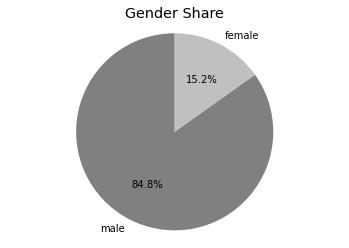

In [293]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Count the number of occurrences for each gender
gender_counts = df['gender'].value_counts()

# Define grayscale colors
colors = ['#808080', '#C0C0C0']

# Plotting a pie chart with grayscale colors
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Set title
plt.title('Gender Share')

# Display the chart
plt.show()


# Thematic concepts


In [63]:
import requests

url = 'https://query.mimotext.uni-trier.de/proxy/wdqs/bigdata/namespace/wdq/sparql'
query = """
prefix wd:<http://data.mimotext.uni-trier.de/entity/> 
prefix wdt:<http://data.mimotext.uni-trier.de/prop/direct/> 

Select  (str(SAMPLE(year(?date))) as ?year) (count(?themelabel) as ?count) ?themelabel 
   WHERE{
   ?item wdt:P36 ?theme.
   ?theme rdfs:label ?themelabel .
   ?item wdt:P9 ?date .
   FILTER(lang(?themelabel) = "en")
   
   BIND(str(year(?date)) as ?year)
   SERVICE wikibase:label {bd:serviceParam wikibase:language "{AUTO_LANGUAGE}","en" .}
  }

GROUP BY ?themelabel ?year ?count
#having (?count> 1)

"""
r = requests.get(url, params = {'format': 'json', 'query': query})
data = r.json()

In [ ]:
data

In [64]:
import pandas as pd
from collections import OrderedDict

novels = []
for item in data['results']['bindings']:
    novels.append(OrderedDict({
        'theme': item['themelabel']['value'],
     #   'narration': item['narrativeFormLabel']['value']
       #     if 'narrativeFormLabel' in item else None,
        'year': item['year']['value']
             if 'year' in item else None,
      #  'theme': item['themeLabel']['value'] 
     #       if 'themeLabel' in item else None,
        'count': item['count']['value'] 
            if 'count' in item else None,
      #  'narrativeLocation': item['narrativeLocationLabel']['value'] 
      #      if 'narrativeLocationLabel' in item else None
    }))

df = pd.DataFrame(novels)
df.set_index('year', inplace=True)
df = df.astype({'theme': str, 'count': float})
df.head()

,theme,count
year,,
1754,travel,7.0
1753,sentiment,7.0
1751,sentiment,6.0
1752,sentiment,4.0
1752,virtue,2.0


<Figure size 1800x3600 with 0 Axes>

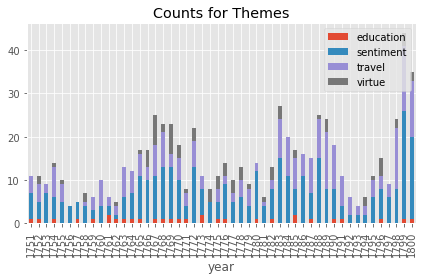

In [103]:
# Filter the dataframe to include only "travel" and "education" values
themes = ['education', 'sentiment', 'travel', 'virtue']
df_filtered = df[df['theme'].isin(themes)]

# Pivot the dataframe to have themes as columns
df_pivot = df_filtered.pivot(columns='theme', values='count')

# Sort the dataframe by years
df_sorted = df_pivot.sort_index()

plt.figure(figsize=(25, 50))
df_sorted.plot(kind='bar', stacked=True)

plt.xlabel('year')
plt.xticks(rotation=90)
plt.title('Counts for Themes')
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(loc='upper right')

plt.tight_layout()



## Resources 

This notebook is inspired by Nikolai Janakievs [notebook](https://github.com/njanakiev/wikidata-mayors/blob/master/wikidata-mayors.ipynb) on mayors on Wikidata. 

He gives a nice list of documentation, tutorials and examples that use Wikidata, too: 

- [RDF Exports from Wikidata](https://tools.wmflabs.org/wikidata-exports/rdf/)
- [Wikidata:List of properties](https://www.wikidata.org/wiki/Wikidata:List_of_properties)
- [Wikidata:Database reports](https://www.wikidata.org/wiki/Wikidata:Database_reports)
- [Wikidata:Database reports/List of properties/Top100](https://www.wikidata.org/wiki/Wikidata:Database_reports/List_of_properties/Top100)
- [Wikidata:Introduction](https://www.wikidata.org/wiki/Wikidata:Introduction)
- [Wikidata:SPARQL queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries)
- [Wikidata:SPARQL queries examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples)
- [Wikidata:Creating a bot](https://www.wikidata.org/wiki/Wikidata:Creating_a_bot)
- [Querying Wikidata About Vienna’s Tram Lines: An Introduction to SPARQL](https://noniq.at/0016/wikidata-sparql-introduction/)
- [How US Presidents Died According to Wikidata](http://ramiro.org/notebook/us-presidents-causes-of-death/)
- [An Ambitious Wikidata Tutorial - SlideShare](https://de.slideshare.net/_Emw/an-ambitious-wikidata-tutorial)
- [Wikidata Graph Builder](https://angryloki.github.io/wikidata-graph-builder/), great tool to visualize Wikidata graphs
- [Histropedia](http://histropedia.com), visualization of historical timelines